In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn

In [2]:
# reading the csv file

df = pd.read_csv("data/dermatology_data.data")

In [3]:
#columns

"""We tried to insert the columns directly into the csv file in our local host,
   but when opened the file in excel, the excel is filling the unknown or empty cells
   with zeros(0).
   So we are expilcitly coding the columns in the code.
"""

df.columns = ['erythema', 'scaling', 'definite borders', 'itching',
       'koebner phenomenon', 'polygonal papules', 'follicular papules',
       'oral mucosal involvement', 'knee and elbow involvement',
       'scalp involvement', 'family history', 'melanin incontinence',
       'eosinophils in the infiltrate', 'PNL infiltrate',
       'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'spongiform pustule',
       'munro microabcess', 'focal hypergranulosis',
       'disappearance of the granular layer',
       'vacuolisation and damage of basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate',
       'band-like infiltrate', 'Age', 'Class Code']

In [4]:
df.describe

<bound method NDFrame.describe of      erythema  scaling  definite borders  itching  koebner phenomenon  \
0           3        3                 3        2                   1   
1           2        1                 2        3                   1   
2           2        2                 2        0                   0   
3           2        3                 2        2                   2   
4           2        3                 2        0                   0   
..        ...      ...               ...      ...                 ...   
360         2        1                 1        0                   1   
361         3        2                 1        0                   1   
362         3        2                 2        2                   3   
363         2        1                 3        1                   2   
364         3        2                 2        0                   0   

     polygonal papules  follicular papules  oral mucosal involvement  \
0                

In [5]:
df.dtypes

erythema                                     int64
scaling                                      int64
definite borders                             int64
itching                                      int64
koebner phenomenon                           int64
polygonal papules                            int64
follicular papules                           int64
oral mucosal involvement                     int64
knee and elbow involvement                   int64
scalp involvement                            int64
family history                               int64
melanin incontinence                         int64
eosinophils in the infiltrate                int64
PNL infiltrate                               int64
fibrosis of the papillary dermis             int64
exocytosis                                   int64
acanthosis                                   int64
hyperkeratosis                               int64
parakeratosis                                int64
clubbing of the rete ridges    

In [6]:
# preparing the correlation matrix

print(df.corr())

                                          erythema   scaling  \
erythema                                  1.000000  0.435607   
scaling                                   0.435607  1.000000   
definite borders                          0.260654  0.360846   
itching                                  -0.047353 -0.085602   
koebner phenomenon                        0.000498 -0.010024   
polygonal papules                         0.033449 -0.074691   
follicular papules                       -0.109647 -0.092188   
oral mucosal involvement                 -0.026946 -0.082639   
knee and elbow involvement                0.141151  0.298182   
scalp involvement                         0.186609  0.302209   
family history                            0.171989  0.181852   
melanin incontinence                      0.042008 -0.074514   
eosinophils in the infiltrate             0.075146  0.042494   
PNL infiltrate                            0.224048  0.283231   
fibrosis of the papillary dermis        

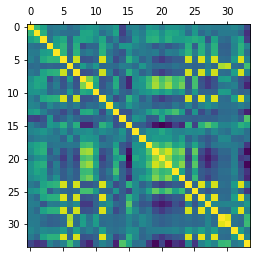

In [7]:
plt.matshow(df.corr())
plt.show()

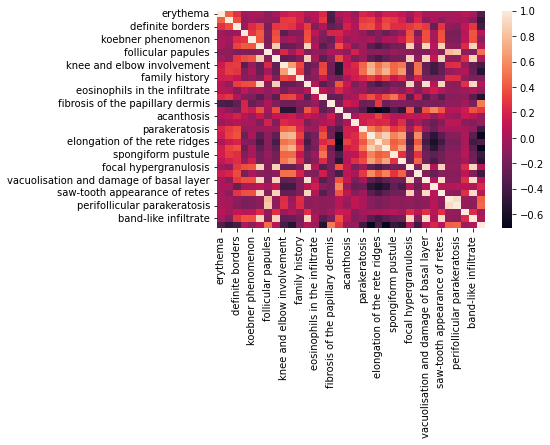

In [8]:
seaborn.heatmap(df.corr())
plt.savefig("plots/Correlation Matrix.png")

In [9]:
# Data Cleaning

"""
Link to the source of data : https://archive.ics.uci.edu/ml/datasets/Dermatology
In the resource itself they provided that there are 8 missing values in Age attribute.
This data is part of an intensive reasearch project.
So there may not be a lot of missing data.
"""

"""
Here I am using regression and I am training the model with all the attributes except 'Age'.
"""

df_copy = df.copy(deep=True)

list_of_indexes = []  # to strore the indexes where the data is '?'
count = 0 

for i in range(len(df_copy)):
    if(df_copy['Age'][i]=='?'):
        count = count + 1
        list_of_indexes.append(i)

print(count)
print(list_of_indexes)

8
[32, 33, 34, 35, 261, 262, 263, 264]


In [10]:
# finding the rows where there is missing data

df_copy[df_copy['Age'] == '?']

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Class Code
32,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,?,1
33,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,4
34,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,2
35,2,1,2,3,2,3,0,2,0,0,...,0,2,0,2,0,0,0,3,?,3
261,2,1,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5
262,1,1,1,3,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,?,5
263,1,1,0,2,0,0,0,0,1,0,...,0,0,2,0,0,0,3,0,?,5
264,1,1,0,3,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5


In [11]:
# dropping the columns from the deep copy of the df to train the model

for i in range(len(df_copy)):
    if(df_copy['Age'][i]=='?'):
        df_copy.drop(i, axis=0, inplace=True)

In [12]:
# ensuring the data was cleaned

df_copy[df_copy['Age'] == '?']

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Class Code


In [13]:
x = df_copy.drop('Age', axis=1) # x -> dataframe without 'Age' attribute
y = df_copy['Age'] # y -> dataframe with just the 'Age' attribute

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = LinearRegression(fit_intercept=True) # defining the linear regression model
model.fit(x,y) # training the model with the cleaned data

LinearRegression()

In [14]:
x_df = df.drop('Age', axis=1).values.reshape(-1,1)
y_df = df['Age']


#predicted_values = model.predict(x_df)

list_of_predicted_values = []

for idx, row in df[df["Age"] == "?"].iterrows():
    x = df.iloc[idx, list(range(33))+[34]]
    age = int (model.predict([x])[0])
    list_of_predicted_values.append([idx, age])
    df.iloc[idx, 33] = age

/home/dheeraj/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/dheeraj/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/dheeraj/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/dheeraj/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/dheeraj/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/dheeraj/.local/lib/python3.8/site-packages/sklearn/bas

In [15]:
list_of_predicted_values # Predicted values by the model along with the row numbers

[[32, 38],
 [33, 34],
 [34, 36],
 [35, 34],
 [261, 37],
 [262, 40],
 [263, 39],
 [264, 36]]

In [16]:
# The data consists of different set of attributes
# One is clinical attributes and second is histopathological attributes

# Selecting the clinical data attributes and creating the clinical dataframe

clinical_df = df[['erythema', 'scaling', 'definite borders', 'itching',
       'koebner phenomenon', 'polygonal papules', 'follicular papules',
       'oral mucosal involvement', 'knee and elbow involvement',
       'scalp involvement', 'family history', 'Age']]

In [17]:
# Selecting the histopathological data attributes and creating the histopathological dataframe

histopathological_df = df[['melanin incontinence',
       'eosinophils in the infiltrate', 'PNL infiltrate',
       'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'spongiform pustule',
       'munro microabcess', 'focal hypergranulosis',
       'disappearance of the granular layer',
       'vacuolisation and damage of basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate',
       'band-like infiltrate']]

In [18]:
clinical_df.describe

<bound method NDFrame.describe of      erythema  scaling  definite borders  itching  koebner phenomenon  \
0           3        3                 3        2                   1   
1           2        1                 2        3                   1   
2           2        2                 2        0                   0   
3           2        3                 2        2                   2   
4           2        3                 2        0                   0   
..        ...      ...               ...      ...                 ...   
360         2        1                 1        0                   1   
361         3        2                 1        0                   1   
362         3        2                 2        2                   3   
363         2        1                 3        1                   2   
364         3        2                 2        0                   0   

     polygonal papules  follicular papules  oral mucosal involvement  \
0                

In [19]:
histopathological_df.describe

<bound method NDFrame.describe of      melanin incontinence  eosinophils in the infiltrate  PNL infiltrate  \
0                       0                              0               1   
1                       1                              0               0   
2                       0                              0               3   
3                       1                              0               0   
4                       0                              2               1   
..                    ...                            ...             ...   
360                     0                              0               1   
361                     0                              0               0   
362                     2                              2               0   
363                     2                              0               0   
364                     0                              0               1   

     fibrosis of the papillary dermis  exocytosis  ac

In [20]:
# Class code is something we want to predict
# But the class code is already provided 
# We want to isolate the data so that we can vrify the output data.

class_code = df['Class Code']

In [21]:
class_code.describe

<bound method NDFrame.describe of 0      1
1      3
2      1
3      3
4      2
      ..
360    4
361    4
362    3
363    3
364    1
Name: Class Code, Length: 365, dtype: int64>

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [23]:
x =  df.drop('Class Code', axis=1)
y = df['Class Code']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size=0.2)

In [24]:
scaler = preprocessing.StandardScaler()

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [25]:
y_pred = pipe.predict(x_test)

In [26]:
print(y_pred)

[1 4 4 5 5 6 2 3 6 3 5 1 5 3 3 1 5 1 5 1 3 5 6 1 4 3 1 5 3 3 2 2 2 3 1 5 1
 5 5 3 1 1 3 4 2 4 3 3 1 1 3 4 1 1 1 2 1 2 2 1 3 4 4 5 2 6 3 1 4 4 2 1 5 5
 2 1 4 1 1 1 5 3 5 3 4 5 1 1 4 1 3 3 1 2 5 2 3 4 1 1 5 2 5 1 3 4 2 1 1 4 2
 1 2 2 2 1 3 1 5 2 3 5 4 6 1 2 3 2 5 1 4 4 4 2 1 1 1 3 1 6 1 2 3 1 6 1 1 4
 3 6 4 1 1 5 3 5 4 2 2 2 3 1 1 3 2 1 3 3 2 3 1 1 3 1 1 3 5 3 3 5 5 4 1 1 3
 2 4 1 2 2 2 3 5 3 3 1 4 1 5 3 2 2 1 1 6 2 1 5 1 3 4 2 2 5 4 5 5 1 2 3 5 2
 1 1 2 3 3 3 5 4 3 3 6 1 2 3 1 1 2 6 1 2 6 3 1 1 4 2 1 1 2 1 1 3 2 2 6 2 1
 4 1 1 3 3 1 5 1 1 1 2 5 5 1 5 1 6 3 2 4 1 2 1 3 2 3 1 4 5 2 3 1 3]


In [27]:
list_of_test_values = list()

for i in y_test:
    list_of_test_values.append(i)

In [28]:
print(list_of_test_values)

[1, 4, 4, 5, 5, 6, 2, 3, 6, 3, 5, 1, 5, 3, 3, 1, 5, 1, 5, 1, 3, 5, 6, 1, 4, 3, 1, 5, 3, 3, 2, 2, 2, 3, 1, 5, 1, 5, 5, 3, 1, 1, 3, 4, 2, 4, 3, 3, 1, 1, 3, 4, 1, 1, 1, 2, 1, 4, 2, 1, 3, 4, 4, 5, 4, 6, 3, 1, 4, 4, 2, 1, 5, 5, 2, 1, 4, 1, 1, 1, 5, 3, 5, 3, 4, 5, 1, 1, 4, 1, 3, 3, 1, 2, 5, 2, 3, 4, 1, 1, 5, 2, 5, 1, 3, 4, 2, 1, 1, 4, 2, 1, 2, 2, 4, 1, 3, 1, 5, 2, 3, 5, 4, 6, 1, 2, 3, 2, 5, 1, 4, 4, 4, 2, 1, 1, 1, 3, 1, 6, 1, 2, 3, 1, 6, 1, 1, 4, 3, 6, 4, 1, 1, 5, 3, 5, 4, 2, 2, 2, 3, 1, 1, 3, 2, 1, 3, 3, 2, 3, 1, 1, 3, 1, 1, 3, 5, 3, 3, 5, 5, 4, 1, 1, 3, 2, 4, 1, 2, 2, 2, 3, 5, 3, 3, 1, 4, 1, 5, 3, 2, 2, 1, 1, 6, 2, 1, 5, 1, 3, 2, 2, 2, 5, 4, 5, 5, 1, 2, 3, 5, 4, 1, 1, 4, 3, 3, 3, 5, 4, 3, 3, 6, 1, 2, 3, 1, 1, 2, 6, 1, 4, 6, 3, 1, 1, 4, 2, 1, 1, 2, 1, 1, 3, 2, 2, 6, 2, 1, 4, 1, 1, 3, 3, 1, 5, 1, 1, 1, 2, 5, 5, 1, 5, 1, 6, 3, 4, 4, 1, 2, 1, 3, 2, 3, 1, 4, 5, 2, 3, 1, 3]


In [29]:
print(len(y_pred))
print(len(list_of_test_values))

292
292


In [30]:
count = 0

for i in range(292):
    if (y_pred[i] != list_of_test_values[i]):
        count = count + 1

print(count)

8


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
randomForestClassifier = RandomForestClassifier()

randomForestClassifier.fit(x_train, y_train)

RandomForestClassifier()

In [33]:
y_pred = randomForestClassifier.predict(x_test)

y_pred

array([1, 4, 4, 5, 5, 6, 2, 3, 6, 3, 5, 1, 5, 3, 3, 1, 5, 1, 5, 1, 3, 5,
       1, 1, 4, 3, 1, 5, 3, 3, 2, 2, 2, 3, 1, 5, 1, 5, 5, 3, 1, 1, 3, 2,
       2, 4, 3, 3, 1, 1, 3, 4, 1, 1, 1, 2, 1, 4, 2, 1, 3, 2, 4, 5, 2, 6,
       3, 1, 4, 4, 2, 1, 5, 5, 2, 1, 4, 1, 1, 1, 5, 3, 5, 3, 4, 5, 1, 1,
       4, 1, 3, 3, 1, 2, 5, 2, 3, 4, 1, 1, 5, 2, 5, 1, 3, 4, 2, 1, 1, 4,
       2, 1, 2, 2, 2, 1, 3, 1, 5, 2, 3, 5, 4, 6, 1, 2, 3, 2, 5, 1, 4, 4,
       4, 2, 1, 1, 1, 3, 1, 6, 1, 2, 3, 1, 6, 1, 1, 4, 3, 6, 4, 1, 1, 5,
       3, 5, 4, 2, 2, 2, 3, 1, 1, 3, 2, 1, 3, 3, 2, 3, 1, 1, 3, 1, 1, 3,
       5, 3, 3, 5, 5, 4, 1, 1, 3, 2, 4, 1, 2, 2, 2, 3, 5, 3, 3, 1, 4, 1,
       5, 3, 2, 2, 1, 1, 6, 2, 1, 5, 1, 3, 4, 2, 2, 5, 4, 5, 5, 1, 2, 3,
       5, 2, 1, 1, 2, 3, 3, 3, 5, 4, 3, 3, 6, 1, 2, 3, 1, 1, 2, 6, 1, 2,
       6, 3, 1, 1, 4, 2, 1, 1, 2, 1, 1, 3, 2, 2, 6, 2, 1, 4, 1, 1, 3, 3,
       1, 5, 1, 1, 1, 2, 5, 5, 1, 5, 1, 6, 3, 2, 4, 1, 2, 1, 3, 2, 3, 1,
       4, 5, 2, 3, 1, 3])

In [34]:
count = 0

for i in range(292):
    if(y_pred[i] != list_of_test_values[i]):
        count = count + 1
        
print(count)

10


In [37]:
from sklearn import svm
from sklearn.svm import SVC

In [40]:
linear_svm = svm.SVC(kernel = 'linear')
linear_svm.fit(x_train, y_train)

SVC(kernel='linear')

In [42]:
y_pred = linear_svm.predict(y_test)

AttributeError: 'Series' object has no attribute 'reshape'